# Installation

In [2]:
!pip install tensorflow

In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#functional Api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

#FOR GPU GROWTH SETUP

In [9]:
# Prevent Out-of-Memory errors by adjusting GPU Memory Consumption Growth
available_gpus = tf.config.experimental.list_physical_devices('GPU')
for device in available_gpus: 
    tf.config.experimental.set_memory_growth(device, True)

In [11]:
print(available_gpus)

[]


In [3]:
POS_PATH = os.path.join('data','positive')
NEG_PATH = os.path.join('data','negative')
ANC_PATH = os.path.join('data','anchor')

In [4]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [5]:
#unzipping labeblled faces in dataset
!tar -xf lfw.tgz

In [6]:
#now move dataset to negative folder using python code (filtering)

import os

for folder in os.listdir('lfw'):
    for image_file in os.listdir(os.path.join('lfw', folder)):
        existing_path = os.path.join('lfw', folder, image_file)
        new_path = os.path.join(NEG_PATH, image_file)
        os.replace(existing_path, new_path)






In [7]:
#check directories
for folder in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', folder)):
        print(os.path.join('lfw', folder, file))
        print(os.path.join(NEG_PATH, file))
        
       


## collecting positive and anchors via webcam

In [54]:
import uuid  #for unique image name
#testing it
'{}.jpg'.format(uuid.uuid1())


'138534e7-fe91-11ee-aa3c-f8da0c4746aa.jpg'

In [8]:
import cv2
import os
import uuid

#connection establish
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # anchor collections 
    if cv2.waitKey(1) & 0XFF == ord('a'):    # Wait for 'a' key press to collect anchor
         
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))  # for uniq file name
         # Save anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):  # Wait for 'p' key press to collect postives
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Save anchor image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):     # Wait for 'q' key press to quit
        break
        

cap.release()
# Closew frame
cv2.destroyAllWindows()

In [9]:
#for getig image directory(creates pipline for diffrerent files path)
import tensorflow as tf

anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300) #grab with extension jpg
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [11]:
ANC_PATH +'\*.jpg'

'data\\anchor\\*.jpg'

In [17]:
# Create an iterator for the anchor dataset
anchor_iterator = anchor.as_numpy_iterator()


In [18]:
# Create an iterator for the positive dataset
positive_iterator = positive.as_numpy_iterator()




In [27]:
# Get the next element from the iterator
next_anchor = anchor_iterator.next()
print(next_anchor)

b'data\\anchor\\6494623d-fe95-11ee-a9f7-f8da0c4746aa.jpg'


In [26]:
# Get the next element from the iterator
next_positive = positive_iterator.next()
print(next_positive)

b'data\\positive\\94b7ac12-fe95-11ee-b1f8-f8da0c4746aa.jpg'


#Preprocessing

In [28]:
import tensorflow as tf

def preprocess_image(file_path):
    # Read image from file path
    image_bytes = tf.io.read_file(file_path)
    
    # Decode JPEG image
    image = tf.io.decode_jpeg(image_bytes)
    
    # Resize image to 100x100x3
    image = tf.image.resize(image, (100, 100))
    
    # Scale image to be between 0 and 1
    image = image / 255.0
    
    return image


In [40]:
image = preprocess_image(r'data\\anchor\\60a31ed8-fe95-11ee-b3d4-f8da0c4746aa.jpg')


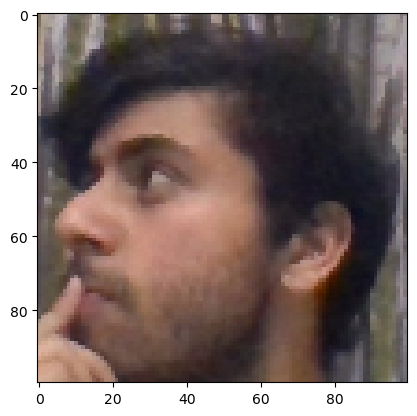

In [41]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [46]:
#for creating labelled dataset
positive_samples = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negative_samples = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positive_samples.concatenate(negative_samples)

In [47]:
tf.ones(len(anchor))


<tf.Tensor: shape=(265,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [49]:
# Create an iterator for the dataset
samples_iterator = data.as_numpy_iterator()

# Get the next element from the iterator
next_sample = samples_iterator.next()

# Print the next sample
print(next_sample)
# at last 1 written in output shows its an example of positie image

(b'data\\anchor\\3ec8e945-ffaf-11ee-bcf7-d481d7e9b3fd.jpg', b'data\\positive\\93deb8c4-fe95-11ee-9b68-f8da0c4746aa.jpg', 1.0)


In [50]:
def preprocess_twin(anchor_img, validation_img, label):
    """
    Preprocesses the anchor and validation images and returns them with the label.

    - anchor_img: The anchor image to be preprocessed.
    - validation_img: The validation image to be preprocessed.
    - label: The label associated with the images.

    Returns:
    A tuple containing the preprocessed anchor image, preprocessed validation image, and label.
    """
    # Preprocess the anchor and validation images
    preprocessed_anchor = preprocess_image(anchor_img)
    preprocessed_validation = preprocess_image(validation_img)
    
    # Return the preprocessed images along with the label
    return (preprocessed_anchor, preprocessed_validation, label)


In [51]:
  result = preprocess_twin(*next_sample)

In [56]:
result #100 by 100 pixel through 3 channels

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.16838235, 0.17230392, 0.1487745 ],
         [0.12058824, 0.12254902, 0.11568628],
         [0.06470589, 0.07745098, 0.08235294],
         ...,
         [0.7470588 , 0.7392157 , 0.7509804 ],
         [0.76666665, 0.7588235 , 0.7705882 ],
         [0.7794118 , 0.77156866, 0.78333336]],
 
        [[0.13210784, 0.1360294 , 0.1125    ],
         [0.08995098, 0.09754902, 0.09044117],
         [0.05857843, 0.07205883, 0.07818627],
         ...,
         [0.7656863 , 0.75784314, 0.77009803],
         [0.78039217, 0.77254903, 0.79068625],
         [0.7892157 , 0.78039217, 0.80196077]],
 
        [[0.08995098, 0.09681372, 0.07696079],
         [0.06764706, 0.07745098, 0.0754902 ],
         [0.04289216, 0.05857843, 0.06838235],
         ...,
         [0.78455883, 0.78186274, 0.79338235],
         [0.7889706 , 0.78406864, 0.80588233],
         [0.79607844, 0.79019606, 0.8147059 ]],
 
        ...,
 
        [[0.27818626, 0.3252451 

In [55]:
len(result)

3

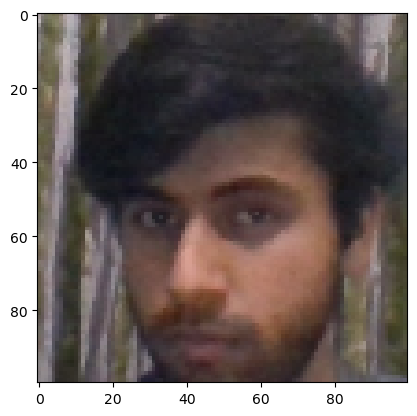

In [53]:
plt.imshow(result[1])

In [59]:
# applying this to data

# DataLoader Pipeline
processed_data = data.map(preprocess_twin)  # Apply preprocess_twin function to each sample
processed_data = processed_data.cache()     # Cache the preprocessed data for faster retrieval
processed_data = processed_data.shuffle(buffer_size=1024)  # Shuffle the data with a buffer size of 1024





In [64]:
samples=processed_data.as_numpy_iterator()

In [66]:
len(samples.next())

3

In [67]:
samples.next()[0]

array([[[0.45294118, 0.41764706, 0.42156863],
        [0.52009803, 0.5056372 , 0.5137255 ],
        [0.6377451 , 0.63284314, 0.6612745 ],
        ...,
        [0.6637255 , 0.64215684, 0.6666667 ],
        [0.67009807, 0.6367647 , 0.65833336],
        [0.5561274 , 0.5208333 , 0.54044116]],

       [[0.47720587, 0.4507353 , 0.45367646],
        [0.5083333 , 0.49166667, 0.5083333 ],
        [0.6107843 , 0.60588235, 0.6343137 ],
        ...,
        [0.6514706 , 0.6406863 , 0.65931374],
        [0.65906864, 0.6365196 , 0.6507353 ],
        [0.5411765 , 0.5088235 , 0.51960784]],

       [[0.49656862, 0.47230393, 0.4862745 ],
        [0.48431373, 0.46764705, 0.48431373],
        [0.5355392 , 0.5252451 , 0.55784315],
        ...,
        [0.64705884, 0.6406863 , 0.65857846],
        [0.6507353 , 0.63480395, 0.64166665],
        [0.55857843, 0.535049  , 0.54289216]],

       ...,

       [[0.29828432, 0.29803923, 0.26740196],
        [0.3156863 , 0.31642157, 0.26789215],
        [0.2997549 , 0

In [76]:
sample_next=samples.next()

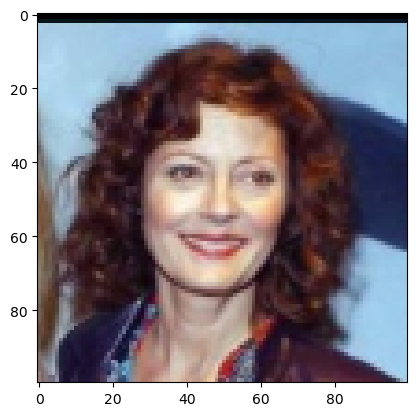

In [77]:

plt.imshow(sample_next[1])

In [78]:
sample_next[2]  # label should be 0 for negativr image it means we re going in right way

0.0

In [79]:
round(len(data) * 0.7)

351

In [88]:
'''Partitioning: Partitioning refers to the process of
dividing the dataset into multiple
subsets for various purposes, such as training, validation, and testing'''


#training and partiotioning steps
# Training partition for image data
train_data = processed_data .take(round(len(data) * 0.7))  # Selects the first 70% of the dataset for training
train_data = train_data.batch(16)  # Batches the images into groups of 16 for efficient training
train_data = train_data.prefetch(8)  # Prefetches batches of images to speed up training by overlapping data preprocessing and model execution





In [89]:
processed_data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [90]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [91]:
train_samples=train_data.as_numpy_iterator()

In [92]:
train_next=samples.next()


In [93]:
len(train_next[0])

100

In [94]:
# Evaluation partition for image data
eval_data = processed_data .skip(round(len(data) * 0.7))  # Skips the first 70% of the dataset
eval_data = eval_data.take(round(len(data) * 0.3))  # Takes the next 30% of the dataset for evaluation
eval_data = eval_data.batch(16)  # Batches the images into groups of 16 for efficient evaluation
eval_data = eval_data.prefetch(8)  # Prefetches batches of images to speed up evaluation by overlapping data preprocessing and model execution


# --------------------end  of data pre-processing-------------------------

# Model Enginnering

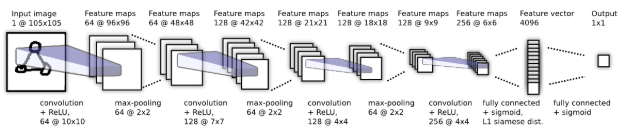

In [100]:
from tensorflow.keras.layers import Input

outcome = Input(shape=(100, 100, 3), name='input_image')


In [102]:
outcome

<KerasTensor shape=(None, 100, 100, 3), dtype=float32, sparse=None, name=input_image>

In [104]:
#RELU activation applied
from tensorflow.keras.layers import  Conv2D
conv_layer1 = Conv2D(64, (10,10), activation='relu')(outcome)

In [107]:
conv_layer1

<KerasTensor shape=(None, 91, 91, 64), dtype=float32, sparse=False, name=keras_tensor_1>

In [112]:
# max p0oling
from tensorflow.keras.layers import  MaxPooling2D

max_p1 = MaxPooling2D(64, (2,2), padding='same')(conv_layer1)

In [113]:
conv_layer2 = Conv2D(128, (7,7), activation='relu')(max_p1)
max_p2 = MaxPooling2D(64, (2,2), padding='same')(conv_layer2)

In [114]:
conv_layer3 = Conv2D(128, (4,4), activation='relu')(max_p2)
max_p3 = MaxPooling2D(64, (2,2), padding='same')(conv_layer3)

In [117]:

from tensorflow.keras.layers import Flatten, Dense
f1 = Flatten()(conv_layer4)
dense1 = Dense(4096, activation='sigmoid')(f1)

In [118]:
dense1

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_11>

In [121]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def create_embedding_model():
    # Define input layer for the image
    input_image = Input(shape=(100, 100, 3), name='input_image')
    
    # First convolutional layer with 64 filters and 10x10 kernel size, ReLU activation
    conv1 = Conv2D(64, (10, 10), activation='relu')(input_image)
    # Max pooling layer to down-sample the input
    max_pool1 = MaxPooling2D(64, (2, 2), padding='same')(conv1)
    
    # Second convolutional layer with 128 filters and 7x7 kernel size, ReLU activation
    conv2 = Conv2D(128, (7, 7), activation='relu')(max_pool1)
    # Max pooling layer
    max_pool2 = MaxPooling2D(64, (2, 2), padding='same')(conv2)
    
    # Third convolutional layer with 128 filters and 4x4 kernel size, ReLU activation
    conv3 = Conv2D(128, (4, 4), activation='relu')(max_pool2)
    # Max pooling layer
    max_pool3 = MaxPooling2D(64, (2, 2), padding='same')(conv3)
    
    # Final convolutional layer with 256 filters and 4x4 kernel size, ReLU activation
    conv4 = Conv2D(256, (4, 4), activation='relu')(max_pool3)
    # Flatten layer to convert 3D feature maps to 1D feature vectors
    flatten = Flatten()(conv4)
    # Fully connected layer with 4096 neurons, sigmoid activation
    dense1 = Dense(4096, activation='sigmoid')(flatten)
    
    # Define and return the embedding model
    embedding_model = Model(inputs=[input_image], outputs=[dense1], name='embedding')
    return embedding_model

# Create the embedding model
embedding_model = create_embedding_model()


In [125]:
print("\033[94m---------------Model show---------------------\033[0m")
embedding_model.summary()


---------------Model show---------------------


Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
# Custom Siamese L1 Distance class
class CustomL1Distance(Layer):
    
    # Constructor
    def __init__(self, **kwargs):
        super().__init__()
       
    # Custom L1 Distance calculation
    def call(self, input_embedding_list, validation_embedding_list):
        # Assuming input_embedding_list and validation_embedding_list are lists of tensors
        result = []
        for input_tensor, validation_tensor in zip(input_embedding_list, validation_embedding_list):
            result.append(tf.math.abs(input_tensor - validation_tensor))
        return result


In [127]:
layer1 = SiameseL1Distance()

# now make siamese neural network

In [184]:
def create_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = CustomL1Distance()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding_model(input_image), embedding_model(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [185]:
siamese_model = make_siamese_model()

In [187]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)        │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ validation_img (InputLayer)   │ (None, 100, 100, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Functional)        │ (None, 4096)              │      38,960,448 │ input_img[0][0],           │
│                               │                           │                 │ validation_img[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ l1_dist_4 (L1Dist)            │ (None, 4096)              │               0 │ embedding[20][0],          │
│                               │                           │                 │ embedding[21][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 1)                 │           4,097 │ l1_dist_4[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING

In [188]:
binary_cross_entropy_loss = tf.losses.BinaryCrossentropy()  
adam_optimizer = tf.keras.optimizers.Adam(1e-4)


In [189]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(optimizer=adam_optimizer, siamese_model=siamese_model)


In [191]:
test_batch = train_data.as_numpy_iterator()

In [192]:
batch_1 = test_batch.next()

In [193]:
A = batch_1[:2]

In [195]:
import numpy as np

np.array(A).shape

(2, 16, 100, 100, 3)

In [196]:
B = batch_1[2]

In [197]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy',
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
        floating-point value which either represents a
        [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
        when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
        `from_logits=False`).

    Args:
        from_logits: Whether to interpret `y_pred` as a tensor of
            [logit](https://en.wikipedi

In [199]:
#BUILD TRAIN STEP FUNCTION
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        images = batch[:2]
        # Get label
        labels = batch[2]
        
        # Forward pass
        predictions = siamese_model(images, training=True)
        # Calculate loss
        loss = binary_cross_entropy_loss(labels, predictions)
    print(loss)
        
    # Calculate gradients
    gradients = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    adam_optimizer.apply_gradients(zip(gradients, siamese_model.trainable_variables))
    
    # Return loss
    return loss


In [274]:
ef colorful_train(data, num_epochs):
    # Initialize a list to store losses for plotting
    losses = []
    
    # Loop through epochs
    for epoch in range(1, num_epochs + 1):
        print('\033[95m\n Epoch {}/{}\033[0m'.format(epoch, num_epochs))
        progbar = tf.keras.utils.Progbar(len(data))
        epoch_loss = []
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step
            loss = train_step(batch)
            epoch_loss.append(loss)
            progbar.update(idx + 1)
        
        # Calculate average loss for the epoch
        avg_epoch_loss = tf.reduce_mean(epoch_loss)
        losses.append(avg_epoch_loss)
        
        # Save checkpoints every 10 epochs
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
    plt.plot(losses)
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [202]:
EPOCHS = 50
colorful_train(train_data, EPOCHS)




 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
21/22 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/stepTensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step

 Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step

 Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step

 Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step

 Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step

 Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step

 Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step

 Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step

 Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step

 Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step

 Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step

 Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step

 Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step

 Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step

 Epoch 15/50
22/22 ━━━━━━━━━━━━━━━

## Model Evlaution








In [206]:
# prediction making
from tensorflow.keras.metrics import Recall, Precision


In [209]:
# Get a batch of test data
test_input, test_val, y_true = eval_data.as_numpy_iterator().next()

In [210]:
test_input.shape

(16, 100, 100, 3)

In [211]:
y_pred = siamese_model.predict([test_input, test_val])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.0000000e+00],
       [1.3706660e-03],
       [1.0000000e+00],
       [2.9824925e-09],
       [1.0000000e+00],
       [2.4067335e-09],
       [2.2621198e-07],
       [9.9950749e-01],
       [9.9988741e-01],
       [2.5018609e-10],
       [9.9999970e-01],
       [2.8725549e-09],
       [9.9999964e-01],
       [3.9466035e-09],
       [2.3229106e-08],
       [4.3482524e-07]], dtype=float32)

In [212]:
[1 if prediction > 0.5 else 0 for prediction in y_pred]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]

In [213]:
y_true

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

In [218]:
# Creating a metric object 
o = Recall()

# Calculating the recall value 
o.update_state(y_true, y_pred)

# Return Recall Result
o.result().numpy()

1.0

In [219]:
# Creating a metric object 
obj = Precision()

# Calculating the recall value 
obj.update_state(y_true, y_pred)

# Return Recall Result
obj.result().numpy()

1.0

#### CNNMODEL

In [235]:
# Check the shapes of your training and evaluation data
print("Train data shapes:")
for data in train_data.take(1):  # Take one batch of training data
    print("Anchor shape:", data[0].shape)
    print("Positive shape:", data[1].shape)
    print("Label shape:", data[2].shape)

print("\nEvaluation data shapes:")
for data in eval_data.take(1):  # Take one batch of evaluation data
    print("Anchor shape:", data[0].shape)
    print("Positive shape:", data[1].shape)
    print("Label shape:", data[2].shape)


Train data shapes:
Anchor shape: (16, 100, 100, 3)
Positive shape: (16, 100, 100, 3)
Label shape: (16,)

Evaluation data shapes:
Anchor shape: (16, 100, 100, 3)
Positive shape: (16, 100, 100, 3)
Label shape: (16,)


In [286]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the directory containing your dataset
dataset_directory = r"C:\Users\AA\Desktop\AI project\data"


# Define the paths to the positive, negative, and anchor folders
positive_dir = os.path.join(dataset_directory, "positive")
negative_dir = os.path.join(dataset_directory, "negative")
anchor_dir = os.path.join(dataset_directory, "anchor")

# Function to load and preprocess images from a directory
def load_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        # Read and preprocess the image (e.g., resize, normalize)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (100, 100))  # Resize to 100x100
        image = image / 255.0  # Normalize pixel values (assuming RGB images)
        images.append(image)
    return np.array(images)

# Load images from positive, negative, and anchor directories
positive_images = load_images_from_dir(positive_dir)
negative_images = load_images_from_dir(negative_dir)
anchor_images = load_images_from_dir(anchor_dir)

# Create labels for positive and negative images
positive_labels = np.ones(len(positive_images))  # Label 1 for positive images
negative_labels = np.zeros(len(negative_images))  # Label 0 for negative images

# Combine positive and negative images and labels
X = np.concatenate((positive_images, negative_images), axis=0)
y = np.concatenate((positive_labels, negative_labels), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, y_train, X_test, y_test ready for training and testing


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define a function to create and train the model with a specific learning rate
def train_model_with_lr(learning_rate):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    return history

# Define a list of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

# Train models with different learning rates and record training history
models_history = {}
for lr in learning_rates:
    history = train_model_with_lr(lr)
    models_history[f'LR={lr}'] = history

# Plot the training history for each model
plt.figure(figsize=(10, 6))
for lr, history in models_history.items():
    plt.plot(history.history['loss'], label=f'Training Loss ({lr})')

plt.title('Change in Training Loss Over Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Create a table to summarize the results
results_df = pd.DataFrame(columns=['Learning Rate', 'Final Training Loss', 'Final Training Accuracy', 'Final Testing Loss', 'Final Testing Accuracy'])
for lr, history in models_history.items():
    final_train_loss = history.history['loss'][-1]
    final_train_accuracy = history.history['accuracy'][-1]
    final_test_loss = history.history['val_loss'][-1]
    final_test_accuracy = history.history['val_accuracy'][-1]
    results_df = results_df.append({'Learning Rate': lr,
                                    'Final Training Loss': final_train_loss,
                                    'Final Training Accuracy': final_train_accuracy,
                                    'Final Testing Loss': final_test_loss,
                                    'Final Testing Accuracy': final_test_accuracy}, ignore_index=True)

# Highlight the best-performing model
best_model_idx = results_df['Final Testing Accuracy'].idxmax()
results_df.loc[best_model_idx, 'Learning Rate'] = f'*{results_df.loc[best_model_idx, "Learning Rate"]}'

print(results_df)
